# Plots for binary mass and period

## stellar mass value: stm= 3.47e10 solar masses
### assuming equal mass: mass of one SMBH:  3.47e10/2
### Assume circular orbit


In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from scipy import constants as c
from astropy import constants as ac
from astropy import units as u

In [46]:
P = 10e2*u.year
stm = 10e8*u.M_sun

In [47]:
P, stm

(<Quantity 1000. yr>, <Quantity 1.e+09 solMass>)

In [48]:
stm.to(u.kg).value, P.to(u.s).value

(np.float64(1.9884098706980508e+39), np.float64(31557600000.0))

In [42]:
dv = smbh2_model(P.to(u.s).value,stm.to(u.kg).value)*u.m/u.s

In [43]:
dv.to(u.km/u.s)

<Quantity 2601.38997439 km / s>

In [44]:
# the model to calculate detla_v:

v2=1187.4653317495377 #km/s
v1=144.67618434566512 #km/s
#d_v=abs(v1-v2)

G=6.67e-11



 #km^3 (solar mass)^-1 years^-2
#from log10(log stellar mass/Msun) = 10.54, stellar mass (stm) aka m1+m2= 3.47 × 10^10  solar masses




def smbh2_model(p, stm): 
    sin3=2/3 #estimate
    numerator = (stm) * 2 * math.pi * G * sin3
    denominator = p
    cube_root = (numerator / denominator) ** (1/3)
    delta_v = cube_root 
    return delta_v

# creating parameter ranges
p_values = np.logspace(1, 4, 50)  # 50 values between 10^3 and 10^8
stm_values = np.logspace(10, 13, 50)  # 50 values between 3.47e8 and 3.47e10

# Create a meshgrid to efficiently calculate delta_v for all combinations
P, STM = np.meshgrid(p_values, stm_values)

# Calculate delta_v for all combinations
delta_v_values = smbh2_model(P, STM)

print("Minimum delta_v:", delta_v_values.min())
print("Maximum delta_v:", delta_v_values.max())

# Find values in the vicinity of 353e9 (+-1e2)
target_delta_v = abs(v2-v1) #array 50x50
tolerance = 100

# Use numpy's where function to find indices of values within the tolerance
indices = np.where(np.abs(delta_v_values - target_delta_v) <= tolerance)

# Extract corresponding p and stm values
p_within_tolerance = P[indices]
stm_within_tolerance = STM[indices]
delta_v_within_tolerance = delta_v_values[indices]

# Print or store the results
print("Found {} values within the tolerance:".format(len(p_within_tolerance)))

for i in range(len(p_within_tolerance)):
    print("p:", p_within_tolerance[i], "stm:", stm_within_tolerance[i], "delta_v:", delta_v_within_tolerance[i])
    
#convert values to lists for plotting
p_list = p_within_tolerance.tolist()
stm_list = stm_within_tolerance.tolist()
delta_v_list = delta_v_within_tolerance.tolist()

Minimum delta_v: 0.06537396322717774
Maximum delta_v: 6.537396322717773
Found 0 values within the tolerance:


In [3]:
target_delta_v

1042.7891474038724

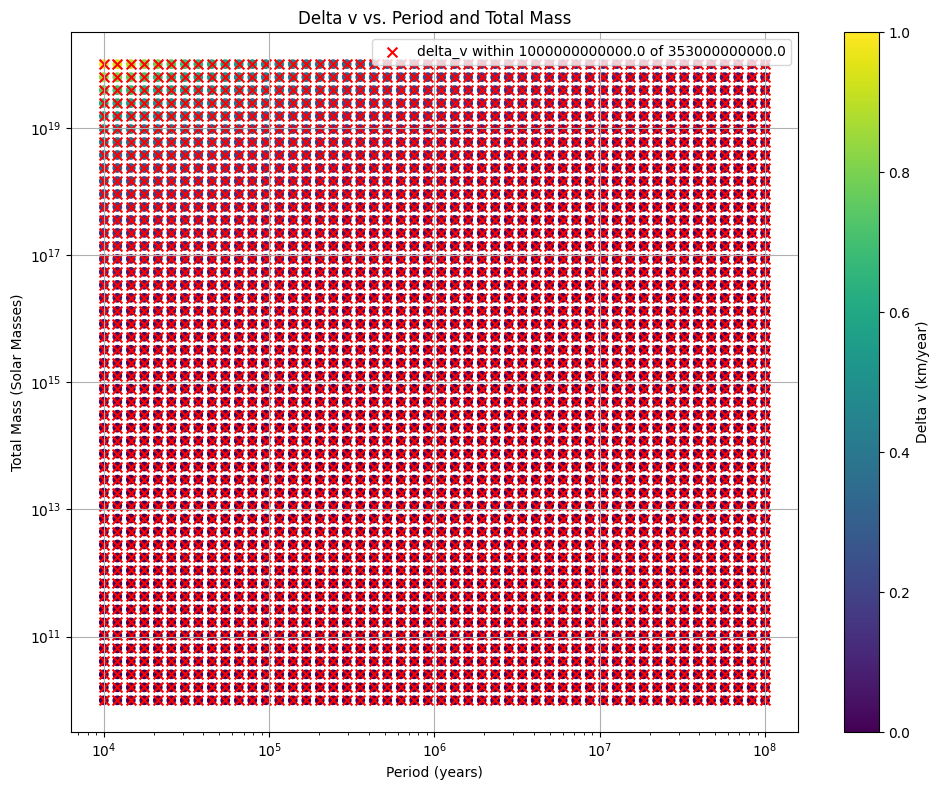

In [4]:
# Plotting
plt.figure(figsize=(10, 8))  # Adjust figure size as needed

# Create the scatter plot, color-coded by delta_v_values
plt.scatter(P, STM, c=delta_v_values, cmap='viridis', norm=plt.Normalize(vmin=delta_v_values.min(), vmax=delta_v_values.max()))  # Use a colormap

# Find values in the vicinity of 353e9 (+-1e2) and highlight them
target_delta_v = 353e9
tolerance = 1e12
indices = np.where(np.abs(delta_v_values - target_delta_v) <= tolerance)
p_within_tolerance = P[indices]
stm_within_tolerance = STM[indices]
plt.scatter(p_within_tolerance, stm_within_tolerance, c='red', label=f'delta_v within {tolerance} of {target_delta_v}', s=50, marker='x')

# Add a colorbar
cbar = plt.colorbar(label='Delta v (km/year)')

# Set axis scales to logarithmic to better visualize the wide range of values
plt.xscale('log')
plt.yscale('log')

# Add labels and title
plt.xlabel('Period (years)')
plt.ylabel('Total Mass (Solar Masses)')
plt.title('Delta v vs. Period and Total Mass')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)  # Add a grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

